Overfitting is not an algorithm in Machine Learning. It is an uncommon phenomenon, Machine Learning model builders need to grasp techniques to avoid this phenomenon.

# Introduction

A quick reminder about Lagrange Interpolation Polynomials: With *N* pairs of points $(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$, there is a unique polynomial of degree *N-1* that passes through all these points so that $P(x_i) = y_i$ for all $i = 1, 2, ..., N$. This polynomial is called the Lagrange Interpolation Polynomial.

Isn’t this similar to finding a model that fits the data in a Supervised Learning problem? It’s even better because in Supervised Learning we only need to approximate it.

The truth is that if a model fits the data too well, it will be counterproductive! This phenomenon in Machine Learning is called ***overfitting***, which is something we always want to avoid when building models.

To get a first look at overfitting, let’s look at the Figure below. There are 50 data points generated by a cubic polynomial plus noise. This data set is split into two, 30 red data points for training data, 20 yellow data points for test data. The graph of this cubic polynomial is given by the green line. Our problem is to assume we don’t know the original model but only the data points, find a “good” model to describe the given data.

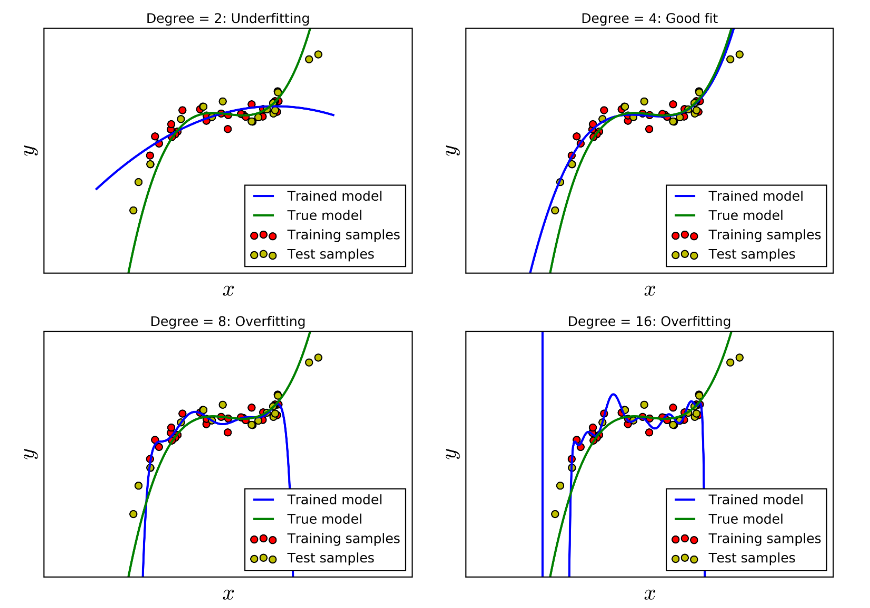

From what we know in Linear Regression, this type of data only apply in Polynomial Regresion. So this can be solve with extended data for a pair of points $(\mathbf{x}, y$ where $\mathbf{x} = [x^0, x^1, x^2, ..., x^d]$ and $y$ is the target value for equation rank $d$.

It is clear that a polynomial of degree no greater than 29 can perfectly *fit* the 30 points in the training data. Let us consider some values $d = 2, 4, 8, 16$.

Based on the figure we can see:
- With $d = 2$, the model is too simple to capture the underlying pattern in the data.
- With $d = 4$, the model is a good fit for the data. The new line is a good approximation of the original cubic polynomial.
- With $d = 8$, the model starting to overfit the data. The new line is too wiggly.
- With $d = 16$, the model is overfitting the data. The new line is too wiggly and it is trying to capture the noise in the data.

Ok so how to avoid this?

Firstly, we need some evaluate value to measure the performance of the model. In this case, we can use the Mean Squared Error (MSE) which is defined as:

$$\text{train error} = \frac{1}{N} \sum_{\text{training set}} (\| \mathbf{y} - \mathbf{\hat{y}}\|)_p^2$$

$$\text{test error} = \frac{1}{N} \sum_{\text{test set}} (\| \mathbf{y} - \mathbf{\hat{y}}\|)_p^2$$

With $p$ can be 1 or 2.

A model is considered good (fit) if both train error and test error are low. If *train error* is low but test error is high, we say the model is overfitting. If *train error* is high and *test error* is high, we say the model is underfitting. If *train error* is high but *test error* is low, I don't know the name of this model, because it is extremely lucky for this phenomenon to occur, or only when the test dataset is too small.

# Validation

We are still used to dividing the data set into two small sets: training data and test data. And one thing I still want to reiterate is that when building a model, we cannot use test data. So how do we know the quality of the model with unseen data (i.e data that has never been seen before)?

The simplest method is to extract a small subset from the training data set and evaluate the model on this small subset. The **small subset extracted from this training set** is called the *validation set*. At this time, **the training set is the remainder of the original training set**. Train error is calculated on this new training set, and there is another concept defined similarly to the *validation error*, which is the error calculated on the *validation set*.

Normally, we start with a simple model, then gradually increase the complexity of the model. When the validation error tends to increase, we choose the previous model. Note that the more complex the model, the smaller the training error tends to be. (**Early Stopping method**)

Take a look on this:

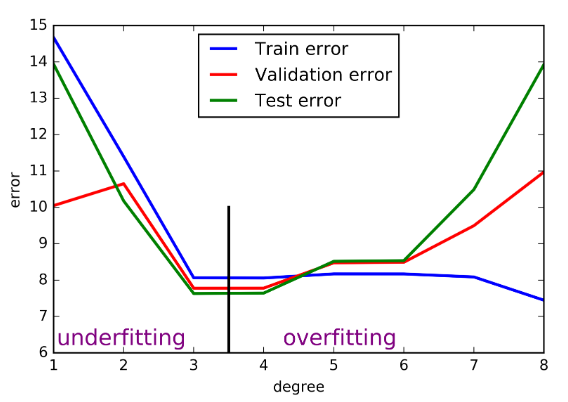

Assume that this is final result. As the degree of the polynomial increases, the train error tends to decrease. This is understandable because the higher the degree of the polynomial, the better the data is fitted. Looking at the red line, when the degree of the polynomial is 3 or 4, the validation error is low, then gradually increases. Based on the validation error, we can determine the degree to choose is 3 or 4. Looking at the green line, which corresponds to the test error, coincidentally, with a degree of 3 or 4, the test error also reaches its smallest value, then gradually increases. So this method here has proven effective.

### Cross Validation

In many cases, we have a very limited amount of data to build a model. If we take too much data from the training set as validation data, the remaining data from the training set is not enough to build a model.

At this point, the validation set must be very small to keep the amount of data for training large enough. However, another problem arises. When the validation set is too small, overfitting can occur with the remaining training set. Is there a solution to this situation?

**Cross validation** is an improvement of *validation* where the amount of data in the *validation* set is small but the quality of the model is evaluated on many different *validation* sets. A commonly used method is to divide the training set into $k$ subsets with no common elements, of approximately equal size. At each test run, called a run, one of the $k$ subsets is taken as the validation set. The model will be built based on the union of the $k - 1$ remaining subsets.

The final model is determined based on the average of the training errors and validation errors. This method is also called **k-fold cross validation**.

When $k$ equals the number of data points, this method is called **Leave-One-Out Cross Validation (LOOCV)**.

# Regularization

A big draw back of Cross Validation is number of training runs is proportional to $k$. This is a big problem when the data set is large. In this case, we can use **Regularization**.

**Regularization**, in simple terms, it is a matter of changing the model a bit to avoid overfitting while still retaining its generality.

### Early Stopping

In the previous section, we have seen that the model is overfitting when the validation error starts to increase. So we can stop the training process when the validation error starts to increase.

Then when should we stop? We can stop when the validation error has not decreased for a certain number of iterations. This method is called **Early Stopping**.

### Add a penalty term

The most common regularization technique is to add an additional term to the loss function. This term is often used to measure the complexity of the model. The larger this term, the more complex the model. This *new loss function* is often called a **regularized loss function**, and is typically defined as follows:

$$J_{\text{reg}}(\theta) = J(\theta) + \lambda R(\theta)$$

Remind that $\theta$ is the parameter of the model, $J(\theta)$ is the loss function, $R(\theta)$ is the regularization term, and $\lambda$ is the regularization parameter.

Minimizing the regularized loss function, roughly speaking, means minimizing both the loss function and the regularization term. I use the phrase “roughly speaking” because the solutions to the optimization problem of the loss function and the regularized loss function are different. We still want this difference to be small, so the regularization parameter $\lambda$ is often chosen to be a small number so that the regularization expression does not degrade the quality of the solution too much.

##### L1 Regularization (Lasso)

$$R(\theta) = \sum_{i=1}^n |\theta_i|$$

This regularization term is used to make the model sparse, i.e. to make some parameters of the model zero. This is useful when we want to reduce the number of features in the model.

But why we don't use L1 Regularization much in Neural Network? Because the derivative of the absolute value function is not defined at 0, so it is difficult to optimize. However, L1 Regularization is still used in some cases.

##### L2 Regularization (Ridge)

We have:

$$R(\mathbf{w}) = \| \mathbf{w} \|_2^2$$

Some points to note:
- This is a *very smooth function*, that is, it has a derivative at every point, its derivative is simply $\mathbf{w}$. And the derivative is:

$$\frac{\partial J_{\text{reg}}}{\partial \mathbf{w}} = \frac{\partial J}{\partial \mathbf{w}} + \lambda \mathbf{w}$$

- Minimize $\| \mathbf{w} \|_2^2$ is equivalent to make it as small as possible (close to 0). 

This method is the most commonly used regularization method in practice.

For Linear Regression, the regularized loss function is:

$$J_{\text{reg}}(\mathbf{w}) = \frac{1}{N} \| \mathbf{y} - \mathbf{Xw} \|_2^2 + \lambda \| \mathbf{w} \|_2^2$$

### Tikhonov Regularization

$$\lambda \| \mathbf{R}(w) = \| \lambda \mathbf{w} \|_2^2$$

With $\gamma$ (capitalized gamma) is a matrix. The most commonly used ​​the diagonal matrix. Note that $l^2$ regularization is a special case of Tikhonov regularization with $\gamma = \lambda \mathbf{I}$.

When the diagonal elements of $\gamma$ are different, the regularization term is called **Weight Decay**. Which assigns different weights to different parameters. The more weighted an element is, the smaller the corresponding solution (to ensure that the loss function is small). With Polynomial Regression, elements with higher weights, making it more likely that they will be close to zero.

### Regularizers for sparsity

In many cases, we want the coefficients to be actually zero, not as small as $l^2$ regularization did above. In that case, another regularization is used, which is $l^0$ regularization:

$$\mathbf{R}(W) = \| \mathbf{w} \|_0$$

Norm 0 is not a true norm but a pseudo-norm. (You are encouraged to read more about norms.) Norm 0 of a vector is the number of non-zero elements in that vector. When norm 0 is small, meaning that many elements in the vector are zero, we say that the vector is ***sparse***.

Solving the problem of minimizing norm 0 is generally difficult because the function is neither convex nor continuous. Instead, norm 1 is often used:

$$\mathbf{R}(W) = \| \mathbf{w} \|_1 = \sum_{i=0}^n |\mathbf{w}_i|$$

Norm 1 is the sum of the absolute values ​​of all the elements. It has been shown that minimizing norm 1 will lead to solutions with many elements equal to 0. Furthermore, since norm 1 is a ***proper norm***, the function is **convex**, and **obviously continuous**, so solving this problem is easier than solving the problem of minimizing norm 0.

When using both $l^2$ and $l^1$ regularization, the regularization term (or model) is called **Elastic Net**

# Other methods

In addition to the methods mentioned above, many other methods to avoid overfitting are also used for each model. A typical example is Dropout in Deep Neural Networks, which has been recently proposed. In short, dropout is a method to randomly turn off units in Networks. Turning off means giving units a zero value and calculating feedforward and backpropagation normally during training. This not only reduces the amount of computation but also reduces overfitting. I would like to come back to this issue if I have the opportunity to talk deeply about Deep Learning in the future.

Readers can find more information with the keywords: pruning (avoid overfitting in Decision Trees), VC dimension (measure the complexity of the model, the greater the complexity, the easier it is to overfit), Batch Normalization (normalize the input of each layer to avoid overfitting), etc.